In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# new_model = tf.keras.models.load_model("C:/Users/shiva/PycharmProjects/jupyter/Mini_project/saved_models/MnM")
# new_model = tf.keras.models.load_model("doc.h5")
# new_model = tf.keras.models.load_model("C:/Users/shiva/PycharmProjects/doc.h5")

# new_model = keras.models.load_model("saved_models/MnM")
# new_model = tf.keras.models.load_model("/junk/saved_model.pb")
new_model = tf.keras.models.load_model("C:/Users/shiva/PycharmProjects/GPU_Check/MnM")

# Check its architecture
new_model.summary()

TypeError: __init__() got an unexpected keyword argument 'ignore_class'

In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train", 
    shuffle = True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

class_names = dataset.class_names
# test_ds = dataset.skip(1757)


Found 4003 files belonging to 2 classes.


In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size) 
    
    return train_ds, val_ds, test_ds

a,b,c = get_dataset_partitions_tf(dataset)

In [21]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


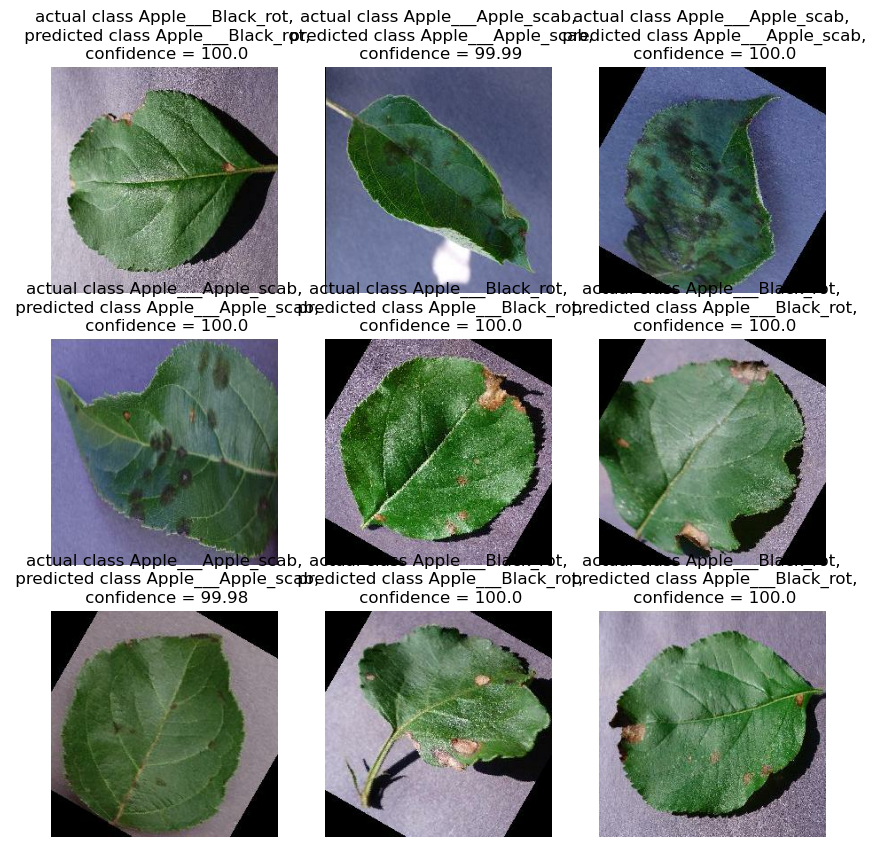

In [22]:
plt.figure(figsize=(10,10))
for images, labels in c.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"actual class {actual_class},\n predicted class {predicted_class},\n confidence = {confidence}")
        
        plt.axis("off")       